In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [3]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

colnames(airbnb) <- newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [5]:
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados*0.092903

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [6]:
airbnb$CodigoPostal[airbnb$CodigoPostal=="" | airbnb$CodigoPostal=="-" | airbnb$CodigoPostal=="28"] <- NA

airbnb$CodigoPostal[substr(airbnb$CodigoPostal, 1, 6) == "Madrid"] <- 28004
airbnb$CodigoPostal[substr(airbnb$CodigoPostal, 1, 2) != "28"] <- NA

airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n28002'] <- '28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28051\n28051'] <- '28051'

airbnb$CodigoPostal[airbnb$CodigoPostal == '2815'] <- '28015'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2805'] <- '28005'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2804'] <- '28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '280013'] <- '28013'

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [7]:
levels(droplevels(airbnb$CodigoPostal))

[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [8]:
sort(table(droplevels(airbnb$CodigoPostal)), TRUE)[1:5]
sort(table(droplevels(airbnb$CodigoPostal)))[1:5]


28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 


28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [9]:
levels(droplevels(airbnb$Barrio[airbnb$CodigoPostal == 28012]))

[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [10]:
sort(table(droplevels(airbnb$Barrio[airbnb$CodigoPostal == 28012])), TRUE)


    Embajadores             Sol          Cortes Palos de Moguer         Palacio 
           1449             301             216              46              27 
        Acacias     Universidad        Arapiles          Atocha        Delicias 
             13               4               1               1               1 
           Goya 
              1 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [11]:
length(levels(airbnb$Barrio))
levels(droplevels(airbnb$Barrio))

[1] 125

[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [12]:
sort(table(airbnb$Barrio), TRUE)[1:5]


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [13]:
length(levels(droplevels(airbnb$TipoAlquiler)))
levels(droplevels(airbnb$TipoAlquiler))

table(airbnb$TipoAlquiler)

[1] 3

[1] "Entire home/apt" "Private room"    "Shared room"


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 668 rows containing non-finite values (stat_boxplot).”


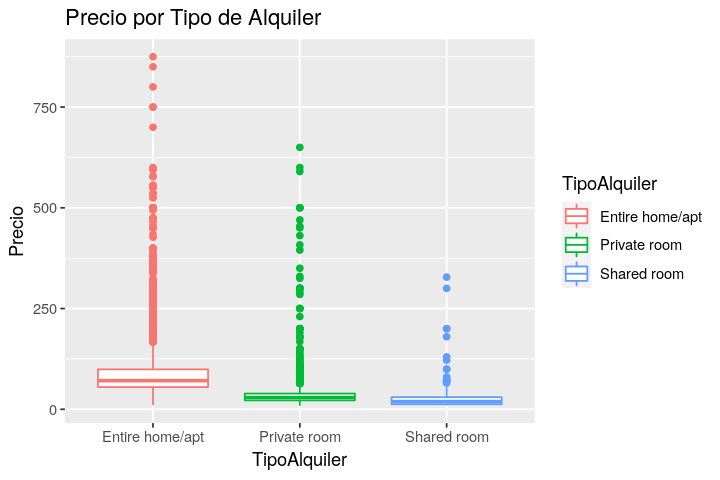

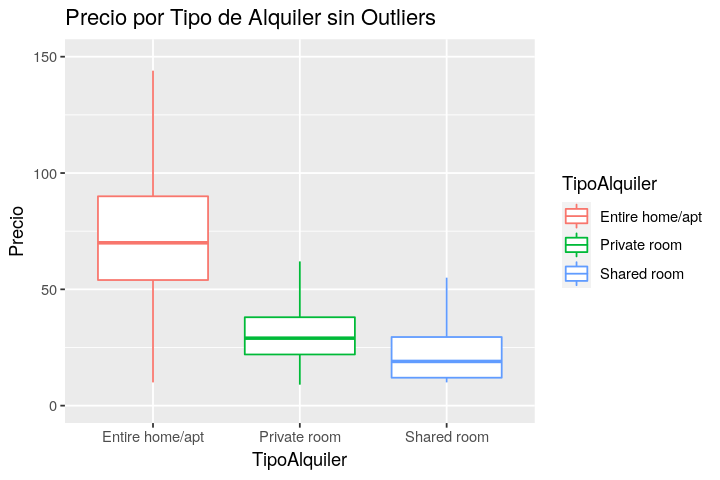

In [14]:
ggplot(data = airbnb, aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+geom_boxplot()+ggtitle("Precio por Tipo de Alquiler")

# Dado que hay muchos outliers que alteran la visualización, procedemos a eliminarlos:
ggplot(data = airbnb, aes(x=TipoAlquiler, y=Precio, color=TipoAlquiler))+geom_boxplot(outlier.shape = NA)+ ylim (0,150) + ggtitle("Precio por Tipo de Alquiler sin Outliers")



Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [15]:
# Cargamos el paquete Dplyr:
require(dplyr)

# Calculamos los precios medios por grupo:
airbnb %>%
group_by(TipoAlquiler) %>%
summarise(mean(Precio, na.rm = TRUE))

paste("__________________________________________________")

# Comprobamos si existe una distribución normal con el test de Shapiro:
paste("P-Value para Entire home/apt: ", shapiro.test(airbnb$Precio[airbnb$TipoAlquiler == "Entire home/apt"][1:5000])$p.value)
paste("P-Value para Private room: ", shapiro.test(airbnb$Precio[airbnb$TipoAlquiler == "Private room"][1:5000])$p.value)
paste("P-Value para Shared room: ", shapiro.test(airbnb$Precio[airbnb$TipoAlquiler == "Shared room"][1:5000])$p.value)

paste("__________________________________________________")

paste("No podemos afirmar que siga una distribución normal por lo que procedemos a aplicar el test de Kruskal-Wallis.")

kruskal.test(data = airbnb, Precio ~ TipoAlquiler)

paste("Dado que el P-Value es muy bajo, podemos afirmar que existe una diferencia significativa entre las medias que no responde a un fenómeno aleatorio")



Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




TipoAlquiler,"mean(Precio, na.rm = TRUE)"
<fct>,<dbl>
Entire home/apt,87.29661
Private room,34.25514
Shared room,29.85340


[1] "__________________________________________________"

[1] "P-Value para Entire home/apt:  1.24077898621874e-72"

[1] "P-Value para Private room:  9.18974842339072e-85"

[1] "P-Value para Shared room:  4.51672121600842e-24"

[1] "__________________________________________________"

[1] "No podemos afirmar que siga una distribución normal por lo que procedemos a aplicar el test de Kruskal-Wallis."


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


[1] "Dado que el P-Value es muy bajo, podemos afirmar que existe una diferencia significativa entre las medias que no responde a un fenómeno aleatorio"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [16]:
airbnb_entire <- airbnb[airbnb$TipoAlquiler == "Entire home/apt",]
head(airbnb_entire)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [17]:
sort(table(airbnb_entire$Barrio), TRUE)[1:5]


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [18]:
PreciosBarrios <- aggregate(Precio ~ Barrio, airbnb_entire, mean, na.rm=TRUE)
PreciosBarrios[order(PreciosBarrios$Precio, decreasing = TRUE),][1:5,]

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [19]:
FrecuenciasBarrios <- table(airbnb_entire$Barrio)
MergeBarrios <- merge(FrecuenciasBarrios, PreciosBarrios, 1)
colnames(MergeBarrios) <- c("Barrio", "Frecuencia", "Precio")
MergeBarrios

Barrio,Frecuencia,Precio
<fct>,<int>,<dbl>
Abrantes,3,46.00000
Acacias,61,68.16393
Adelfas,33,68.72727
Aeropuerto,2,38.00000
Aguilas,2,54.50000
Alameda de Osuna,4,138.75000
Almagro,97,109.18557
Almenara,25,65.68000
Almendrales,18,77.50000


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [20]:
topPrecios <- MergeBarrios |>
filter(Frecuencia > 100) |>
select(Barrio, Precio, Frecuencia) |>
top_n(5, Precio) |>
arrange(desc(Precio, Frecuencia))

topPrecios

Barrio,Precio,Frecuencia
<fct>,<dbl>,<int>
Recoletos,161.92537,135
Goya,111.33803,142
Sol,100.75036,701
Trafalgar,98.57848,223
Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


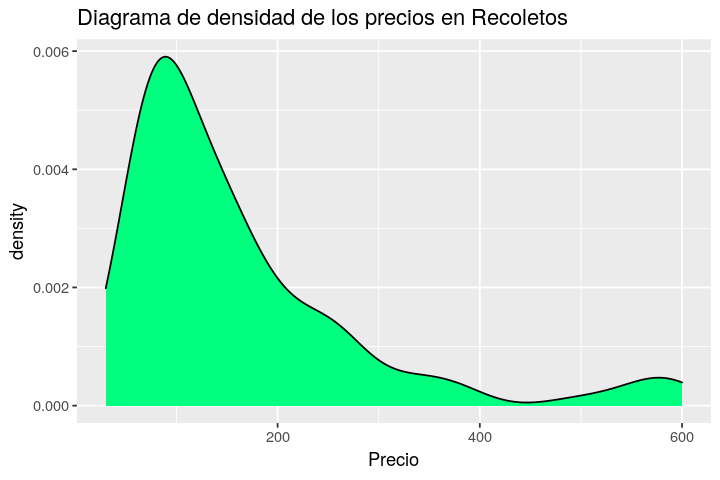

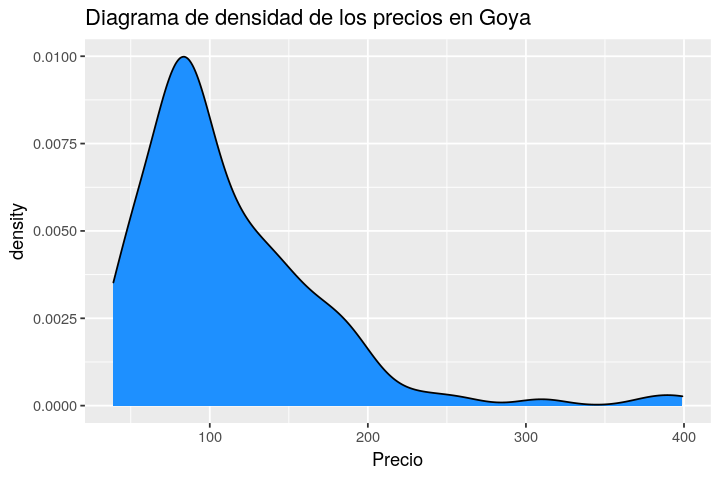

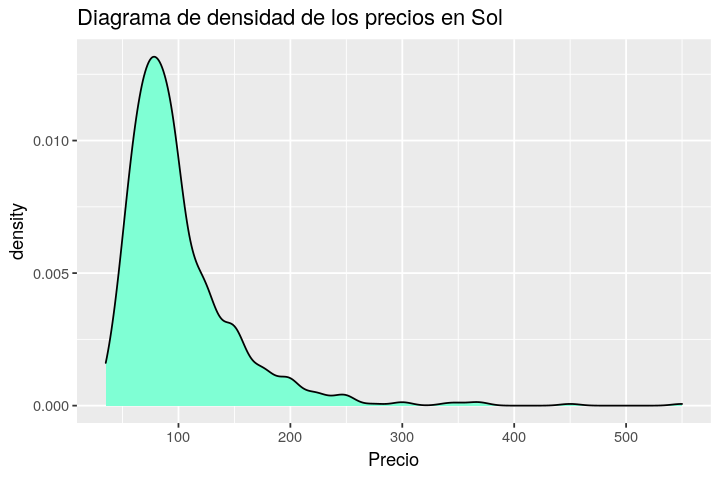

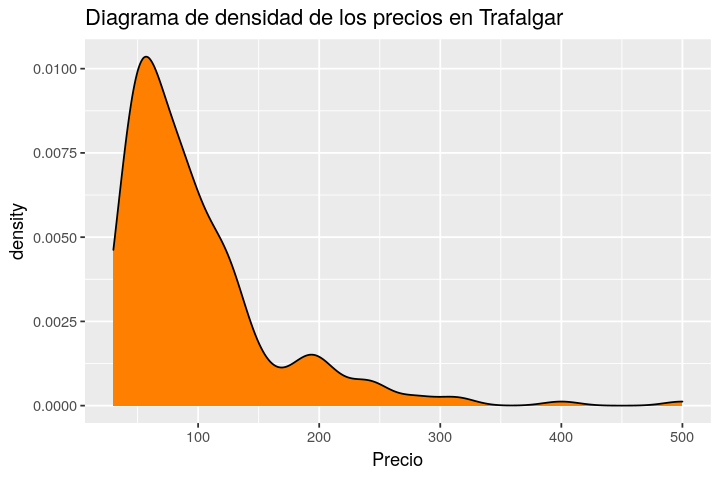

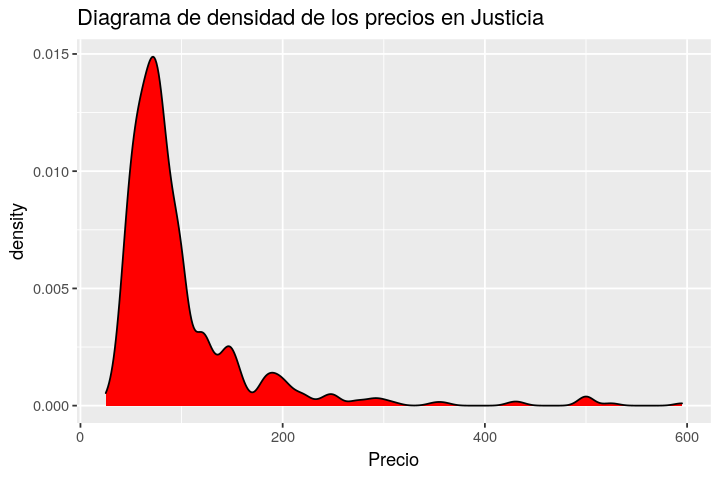

In [21]:
recoletos <- as.data.frame(airbnb_entire |> filter(Barrio == "Recoletos") |> select(Precio))
ggplot(recoletos, aes(Precio)) + geom_density(fill="springgreen1",color="#010101") + ggtitle("Diagrama de densidad de los precios en Recoletos")

goya <- as.data.frame(airbnb_entire |> filter(Barrio == "Goya") |> select(Precio))
ggplot(goya, aes(Precio)) + geom_density(fill="dodgerblue1",color="#010101") + ggtitle("Diagrama de densidad de los precios en Goya")

sol <- as.data.frame(airbnb_entire |> filter(Barrio == "Sol") |> select(Precio))
ggplot(sol, aes(Precio)) + geom_density(fill="aquamarine1",color="#010101") + ggtitle("Diagrama de densidad de los precios en Sol")

trafalgar <- as.data.frame(airbnb_entire |> filter(Barrio == "Trafalgar") |> select(Precio))
ggplot(trafalgar, aes(Precio)) + geom_density(fill="darkorange1",color="#010101") + ggtitle("Diagrama de densidad de los precios en Trafalgar")

justicia <- as.data.frame(airbnb_entire |> filter(Barrio == "Justicia") |> select(Precio))
ggplot(justicia, aes(Precio)) + geom_density(fill="red",color="#010101") + ggtitle("Diagrama de densidad de los precios en Justicia")

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [22]:
metrosMedios <- aggregate(MetrosCuadrados ~ Barrio, airbnb_entire, mean, na.rm=TRUE)
mergeMetros <- merge(topPrecios, metrosMedios, by = 1, na.rm = TRUE)
mergeMetros

Barrio,Precio,Frecuencia,MetrosCuadrados
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Warning message:
“Removed 139 rows containing non-finite values (stat_density).”
Warning message:
“Removed 517 rows containing non-finite values (stat_density).”


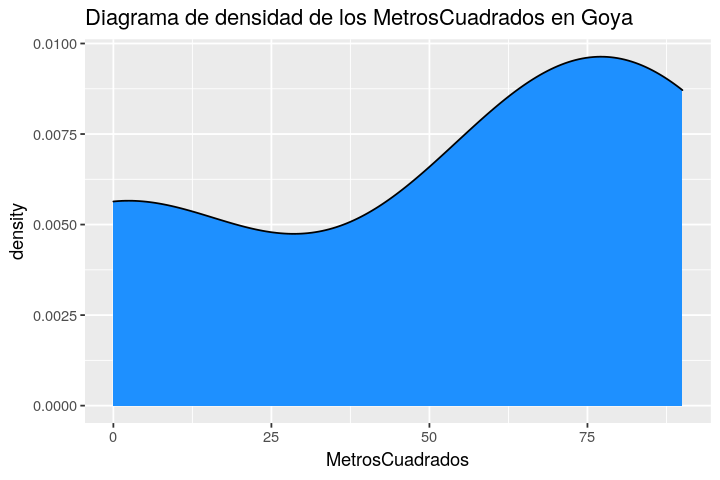

Warning message:
“Removed 132 rows containing non-finite values (stat_density).”


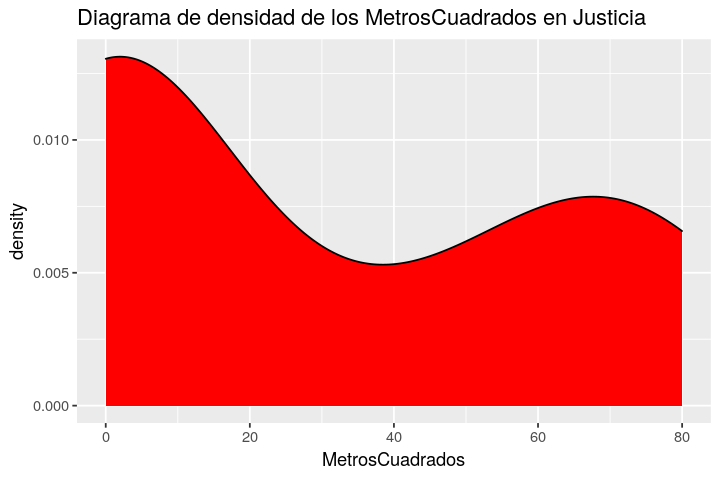

Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


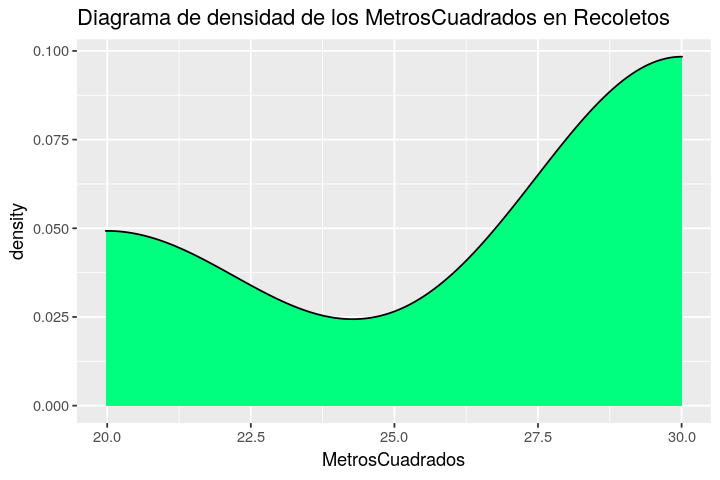

Warning message:
“Removed 216 rows containing non-finite values (stat_density).”


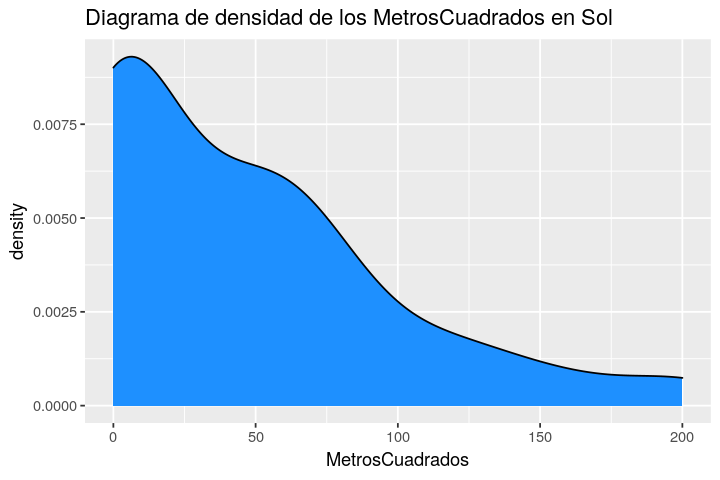

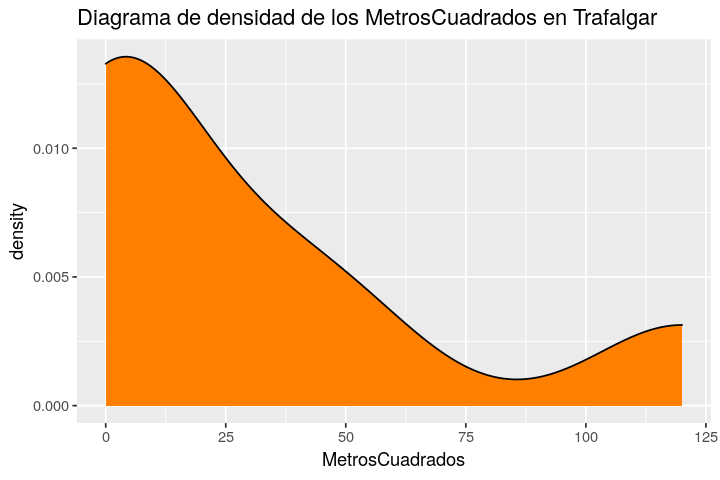

In [23]:
Goya <- as.data.frame(airbnb_entire |> filter(Barrio == "Goya"))
ggplot(Goya, aes(MetrosCuadrados)) + geom_density(fill="dodgerblue1",color="#010101") + ggtitle("Diagrama de densidad de los MetrosCuadrados en Goya")

Justicia <- as.data.frame(airbnb_entire |> filter(Barrio == "Justicia"))
ggplot(Justicia, aes(MetrosCuadrados)) + geom_density(fill="red",color="#010101") + ggtitle("Diagrama de densidad de los MetrosCuadrados en Justicia")

Recoletos <- as.data.frame(airbnb_entire |> filter(Barrio == "Recoletos"))
ggplot(Recoletos, aes(MetrosCuadrados)) + geom_density(fill="springgreen1",color="#010101") + ggtitle("Diagrama de densidad de los MetrosCuadrados en Recoletos")

Sol <- as.data.frame(airbnb_entire |> filter(Barrio == "Sol"))
ggplot(Sol, aes(MetrosCuadrados)) + geom_density(fill="dodgerblue1",color="#010101") + ggtitle("Diagrama de densidad de los MetrosCuadrados en Sol")

Trafalgar <- as.data.frame(airbnb_entire |> filter(Barrio == "Trafalgar"))
ggplot(Trafalgar, aes(MetrosCuadrados)) + geom_density(fill="darkorange1",color="#010101") + ggtitle("Diagrama de densidad de los MetrosCuadrados en Trafalgar")

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [24]:
# Comprobamos si siguen una distribución normal con el test de Shapiro
paste("Goya P-Value:", shapiro.test(Goya$MetrosCuadrados)$p.value)
paste("Sol P-Value:", shapiro.test(Sol$MetrosCuadrados)$p.value)
paste("Trafalgar P-Value:", shapiro.test(Trafalgar$MetrosCuadrados)$p.value)
paste("Recoletos P-Value:", shapiro.test(Recoletos$MetrosCuadrados)$p.value)
paste("Justicia P-Value:", shapiro.test(Justicia$MetrosCuadrados)$p.value)

paste("Dados los resultados no podemos afirmar que los datos sigan una distribución normal, por ello recurrimos al test de Kruskal-Wallis")

barrios <- airbnb_entire |> filter (Barrio == "Goya" | Barrio == "Sol" | Barrio == "Recoletos" | Barrio == "Trafalgar" | Barrio == "Justicia")
kruskalTest <- kruskal.test(data = barrios, MetrosCuadrados ~Barrio)
kruskalTest

paste("Dado que el P-Value obtenido es muy alto (", round(kruskalTest$p.value,4), ") no podemos afirmar que haya diferencias estadísticamente significativas entre las medias que no se deban a un fenómeno aleatorio")

[1] "Goya P-Value: 0.519924091564745"

[1] "Sol P-Value: 8.6913775134728e-07"

[1] "Trafalgar P-Value: 0.0127581397426826"

[1] "Recoletos P-Value: 0"

[1] "Justicia P-Value: 0.00064192630271212"

[1] "Dados los resultados no podemos afirmar que los datos sigan una distribución normal, por ello recurrimos al test de Kruskal-Wallis"


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


[1] "Dado que el P-Value obtenido es muy alto ( 0.7574 ) no podemos afirmar que haya diferencias estadísticamente significativas entre las medias que no se deban a un fenómeno aleatorio"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [25]:
barrio_sol <- subset(airbnb_entire,Barrio=="Sol")

modelo <- lm(data = barrio_sol, formula = MetrosCuadrados ~ MaxOcupantes + NumBanyos + NumDormitorios)
summary(modelo)


Call:
lm(formula = MetrosCuadrados ~ MaxOcupantes + NumBanyos + NumDormitorios, 
    data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-87.723 -29.574  -0.324  30.441 110.415 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -1.827     13.708  -0.133  0.89443   
MaxOcupantes     -2.543      3.463  -0.734  0.46585   
NumBanyos        18.028     13.362   1.349  0.18272   
NumDormitorios   23.544      8.183   2.877  0.00567 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 43.34 on 56 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.3452,	Adjusted R-squared:  0.3102 
F-statistic: 9.843 on 3 and 56 DF,  p-value: 2.597e-05


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [26]:
cor(barrio_sol[c("MetrosCuadrados", "NumBanyos", "NumDormitorios", "MaxOcupantes")], use = "complete.obs")

,MetrosCuadrados,NumBanyos,NumDormitorios,MaxOcupantes
MetrosCuadrados,1.0000000,0.4820549,0.5684521,0.4286233
NumBanyos,0.4820549,1.0000000,0.6873719,0.7017290
NumDormitorios,0.5684521,0.6873719,1.0000000,0.7853809
MaxOcupantes,0.4286233,0.7017290,0.7853809,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


[1] "Dado que puede haber entradas erróneas, no podemos fiarnos de dichas correlaciones sin antes comprobar los datos visualizando un histograma o una curva de densidad"

Warning message:
“Removed 641 rows containing non-finite values (stat_density).”


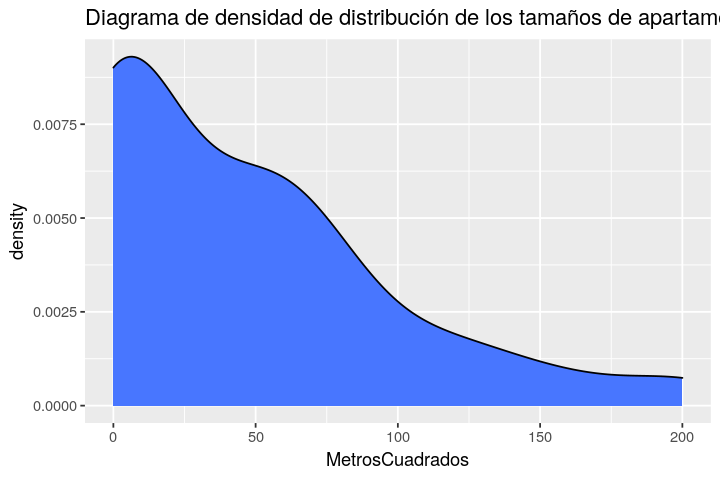

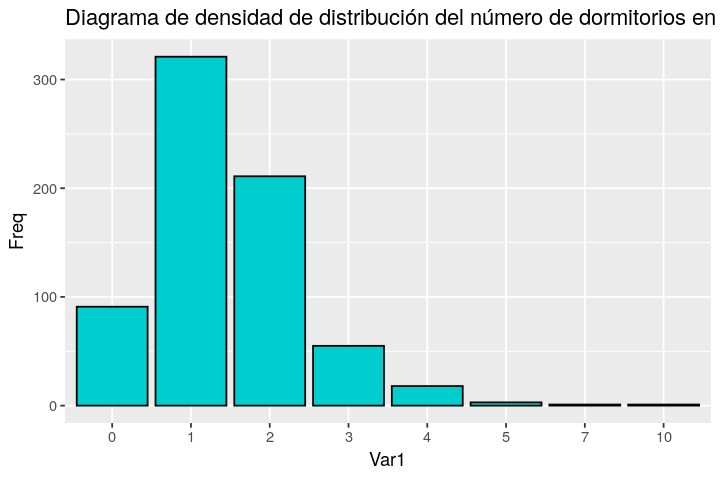

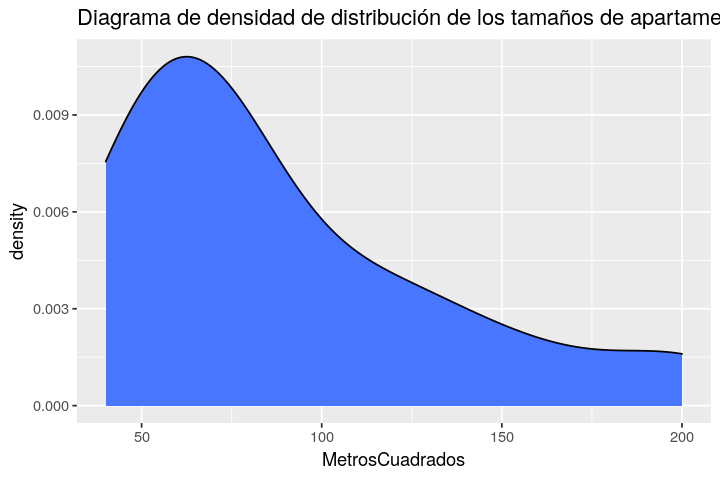

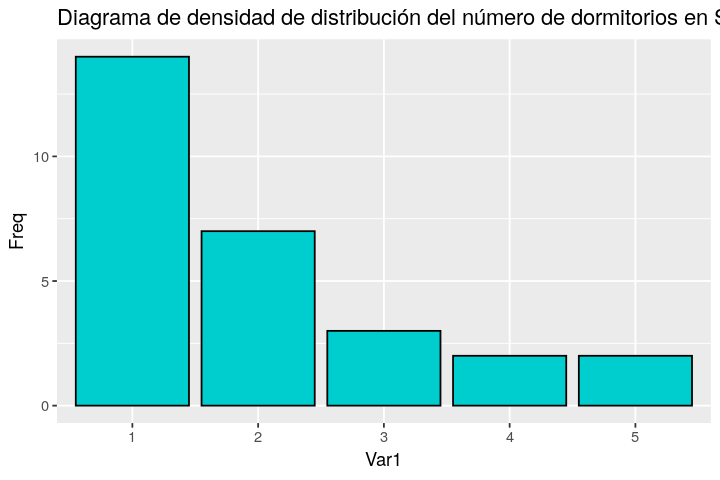

In [27]:
paste("Dado que puede haber entradas erróneas, no podemos fiarnos de dichas correlaciones sin antes comprobar los datos visualizando un histograma o una curva de densidad")

NumDorm <- as.data.frame(table(barrio_sol$NumDormitorios))
ggplot(data=barrio_sol,aes(MetrosCuadrados)) + geom_density(fill="royalblue1",color="#010101") + ggtitle("Diagrama de densidad de distribución de los tamaños de apartamentos en Sol")
ggplot(data=NumDorm,aes(x=Var1, y=Freq)) + geom_col(fill="cyan3",color="#010101") + ggtitle("Diagrama de densidad de distribución del número de dormitorios en Sol")

# Trabajaremos sobre registros que tengan un mínimo de metros cuadrados, dado que tratándose de pisos completos, es lógico que tengan un cierto tamaño (>30 Metros Cuadrados)
barrio_sol_limpio <- subset(barrio_sol, MetrosCuadrados >= 35)

# Del mismo modo, no tiene sentido que tratándose de apartamentos completos, el número de dormitorios sea 0, por lo que procedemos a limpiarlos
barrio_sol_limpio <- subset(barrio_sol_limpio, NumDormitorios > 0)

NumDorm <- as.data.frame(table(barrio_sol_limpio$NumDormitorios))
ggplot(data=barrio_sol_limpio,aes(MetrosCuadrados)) + geom_density(fill="royalblue1",color="#010101") + ggtitle("Diagrama de densidad de distribución de los tamaños de apartamentos en Sol")
ggplot(data=NumDorm,aes(x=Var1, y=Freq)) + geom_col(fill="cyan3",color="#010101") + ggtitle("Diagrama de densidad de distribución del número de dormitorios en Sol")





Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [28]:
require(MASS)

modeloPrecio <- lm(data = barrio_sol_limpio, Precio ~ MaxOcupantes + NumBanyos + NumDormitorios + NumCamas + Puntuacion + MetrosCuadrados)
summary(modeloPrecio)

paste("En una primera comprobación observamos que la variable más influyente es el número de dormitorios")

modeloPrecio2 <-stepAIC(modeloPrecio, trace=FALSE)
modeloPrecio2

paste("Con esta segunda comprobación llegamos a la misma conclusión")


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Call:
lm(formula = Precio ~ MaxOcupantes + NumBanyos + NumDormitorios + 
    NumCamas + Puntuacion + MetrosCuadrados, data = barrio_sol_limpio)

Residuals:
    Min      1Q  Median      3Q     Max 
-71.956 -10.927   4.143  21.107  48.334 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)   
(Intercept)     -154.12071   86.87401  -1.774  0.09055 . 
MaxOcupantes       6.83711    6.94173   0.985  0.33587   
NumBanyos          2.25482   16.49493   0.137  0.89257   
NumDormitorios    41.11134   11.36600   3.617  0.00162 **
NumCamas          -6.33050    6.66925  -0.949  0.35331   
Puntuacion         1.96180    0.96879   2.025  0.05577 . 
MetrosCuadrados   -0.05583    0.24894  -0.224  0.82470   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.81 on 21 degrees of freedom
Multiple R-squared:  0.7927,	Adjusted R-squared:  0.7334 
F-statistic: 13.38 on 6 and 21 DF,  p-value: 3.16e-06


[1] "En una primera comprobación observamos que la variable más influyente es el número de dormitorios"


Call:
lm(formula = Precio ~ NumDormitorios + Puntuacion, data = barrio_sol_limpio)

Coefficients:
   (Intercept)  NumDormitorios      Puntuacion  
      -131.740          41.636           1.868  


[1] "Con esta segunda comprobación llegamos a la misma conclusión"

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [29]:
paste("La variable más relevante, de acuerdo a ambos modelos, es el número de dormitorios, por tener un P-Value inferior a las demás variables")

[1] "La variable más relevante, de acuerdo a ambos modelos, es el número de dormitorios, por tener un P-Value inferior a las demás variables"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [30]:
modeloMetros <- lm(data = barrio_sol_limpio, formula = Precio ~ MetrosCuadrados)
confint(modeloMetros)

paste("Por cada metro cuadrado, el precio aumenta entre", confint(modeloMetros)[2,1], "y", confint(modeloMetros)[2,2], "euros")

,2.5 %,97.5 %
(Intercept),-5.2381438,67.425094
MetrosCuadrados,0.6204619,1.351517


[1] "Por cada metro cuadrado, el precio aumenta entre 0.620461930667791 y 1.35151691117841 euros"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [31]:
modeloHabitacion <- lm(data = barrio_sol_limpio, formula = Precio ~ NumDormitorios)
confint(modeloHabitacion)

paste("Por cada dormitorio, el precio aumenta entre", confint(modeloHabitacion)[2,1], "y", confint(modeloHabitacion)[2,2], "euros")

,2.5 %,97.5 %
(Intercept),12.73840,60.79444
NumDormitorios,31.20842,51.90214


[1] "Por cada dormitorio, el precio aumenta entre 31.2084195612172 y 51.9021373797637 euros"

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [32]:
paste("La probabilidad es de:", nrow(barrio_sol_limpio[barrio_sol_limpio$NumDormitorios==3,])/nrow(barrio_sol_limpio))

paste("El intervalo de confianza lo comprobamos con binom.test:")
binom.test(nrow(barrio_sol_limpio[barrio_sol_limpio$NumDormitorios==3,]),nrow(barrio_sol_limpio))

[1] "La probabilidad es de: 0.107142857142857"

[1] "El intervalo de confianza lo comprobamos con binom.test:"


	Exact binomial test

data:  nrow(barrio_sol_limpio[barrio_sol_limpio$NumDormitorios == 3, ]) and nrow(barrio_sol_limpio)
number of successes = 3, number of trials = 28, p-value = 2.744e-05
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.02266509 0.28226440
sample estimates:
probability of success 
             0.1071429 
